### Slade Brooks
##### brooksl@mail.uc.edu
##### 02.17.2023
# AeroComputing Assignment 4

This code

# Part 1

In [10]:
# import shtuff
import matplotlib.pyplot as plt
import numpy as np
import sys

# import custom modules
sys.path.append("..//lib//")
import pyvot

# Part 2

## Part A

In [11]:
# create datasets for problem 15
T = np.array([-250., -200., -100., 0., 100., 300.])
cp = np.array([0.0163, 0.318, 0.699, 0.87, 0.941, 1.04])

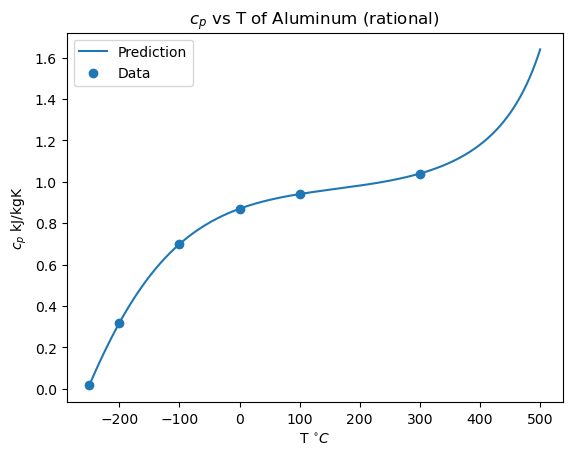

In [12]:
# solve with rational

# create array for vals
cpsr = np.empty(750, dtype="float64")

# set up new T range
Tsr = np.linspace(-250, 500, 750)

# compute val at each T
for i in range(0, len(Tsr)):
    cpsr[i] = pyvot.rational(T.copy(), cp.copy(), Tsr[i])

# plot dat shtuff
plt.plot(Tsr, cpsr, label="Prediction")
plt.scatter(T, cp, label="Data")
plt.legend()
plt.xlabel("T $^{\circ}C$")
plt.ylabel("$c_{p}$ kJ/kgK")
plt.title("$c_{p}$ vs T of Aluminum (rational)")
plt.show()

We can see that the rational prediction indicates a positive exponential growth trend after the data ends.

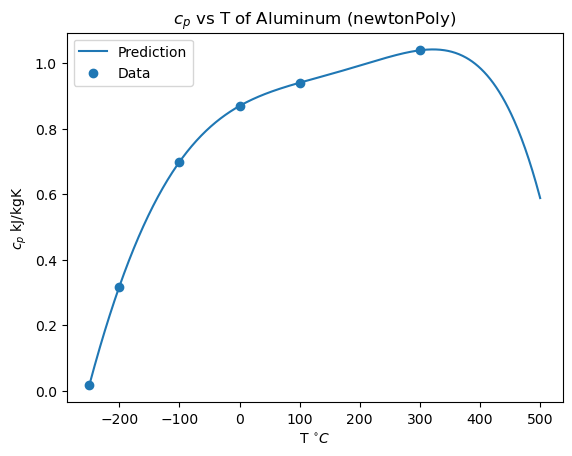

In [13]:
# solve with newtonPoly

# get coefficients of newton's poly
a = pyvot.coeffts(T.copy(), cp.copy())

# create array for vals
cpsN = np.empty(750, dtype="float64")

# set up new T range
TsN = np.linspace(-250, 500, 750)

# compute val at each T
for i in range(0, len(TsN)):
    cpsN[i] = pyvot.evalPoly(a, T.copy(), TsN[i])

# plot dat shtuff
plt.plot(TsN, cpsN, label="Prediction")
plt.scatter(T, cp, label="Data")
plt.legend()
plt.xlabel("T $^{\circ}C$")
plt.ylabel("$c_{p}$ kJ/kgK")
plt.title("$c_{p}$ vs T of Aluminum (newtonPoly)")
plt.show()

We can see that the newtonPoly prediction indicates a negative exponential growth trend after the data ends.

## Part B

In [14]:
# create datasets for problem 17
Re = np.array([0.2, 2., 20., 200., 2000., 20000.])
cd = np.array([103., 13.9, 2.72, 0.8, 0.401, 0.433])

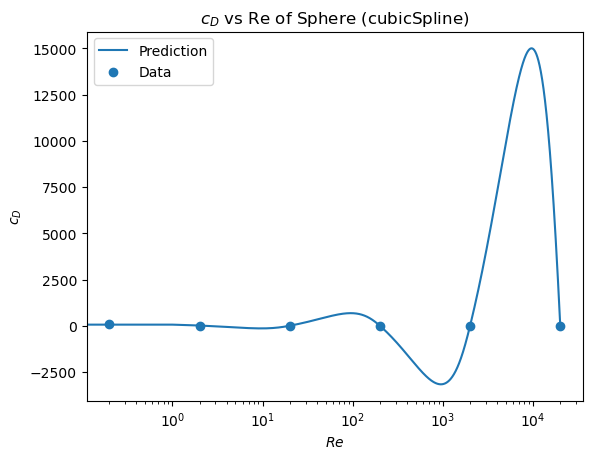

CD = -88.946 @ Re = 5
CD = 458.315 @ Re = 50
CD = -2118.883 @ Re = 500
CD = 9921.542 @ Re = 5000


In [15]:
# solve using cubicSpline

# create array for desired study points
ResC = np.linspace(0, 20000, 20000)

# create array for vals
cdsC = np.empty(len(ResC), dtype="float64")

# find out about dem curves
k = pyvot.curvatures(Re.copy(), cd.copy())

# find Cd @ each Re
for i in range(0, len(ResC)):
    cdsC[i] = pyvot.evalSpline(Re.copy(), cd.copy(), k, ResC[i])

# plot dat shtuff
plt.semilogx(ResC, cdsC, label="Prediction")
plt.scatter(Re, cd, label="Data")
plt.legend()
plt.xlabel("$Re$")
plt.ylabel("$c_{D}$")
plt.title("$c_{D}$ vs Re of Sphere (cubicSpline)")
plt.show()

# print values asked for in question
print("CD = {:.3f} @ Re = 5".format(cdsC[5]))
print("CD = {:.3f} @ Re = 50".format(cdsC[50]))
print("CD = {:.3f} @ Re = 500".format(cdsC[500]))
print("CD = {:.3f} @ Re = 5000".format(cdsC[5000]))

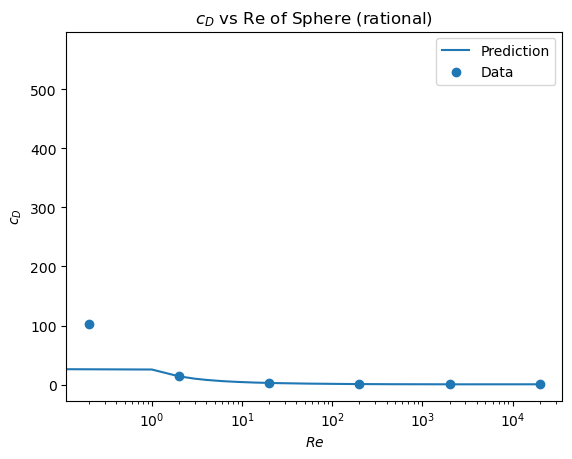

CD = 6.662 @ Re = 5
CD = 1.652 @ Re = 50
CD = 0.545 @ Re = 500
CD = 0.380 @ Re = 5000


In [16]:
# solve using rational

# set up new T range
ResR = np.linspace(0, 20000, 20000)

# create array for vals
cdsR = np.empty(len(ResR), dtype="float64")

# compute val at each T
for i in range(0, len(ResR)):
    cdsR[i] = pyvot.rational(Re.copy(), cd.copy(), ResR[i])

# plot dat shtuff
plt.semilogx(ResR, cdsR, label="Prediction")
plt.scatter(Re, cd, label="Data")
plt.legend()
plt.xlabel("$Re$")
plt.ylabel("$c_{D}$")
plt.title("$c_{D}$ vs Re of Sphere (rational)")
plt.show()

# print values asked for in question
print("CD = {:.3f} @ Re = 5".format(cdsR[5]))
print("CD = {:.3f} @ Re = 50".format(cdsR[50]))
print("CD = {:.3f} @ Re = 500".format(cdsR[500]))
print("CD = {:.3f} @ Re = 5000".format(cdsR[5000]))

# Part 3

## Part A

In [17]:
# create datasets of data
year = np.linspace(1994, 2009, 16)
ppm = np.array([356.8, 358.2, 360.3, 361.8, 364., 365.7, 366.7, 368.2, \
                370.5, 372.2, 374.9, 376.7, 378.7, 381., 382.9, 384.7])

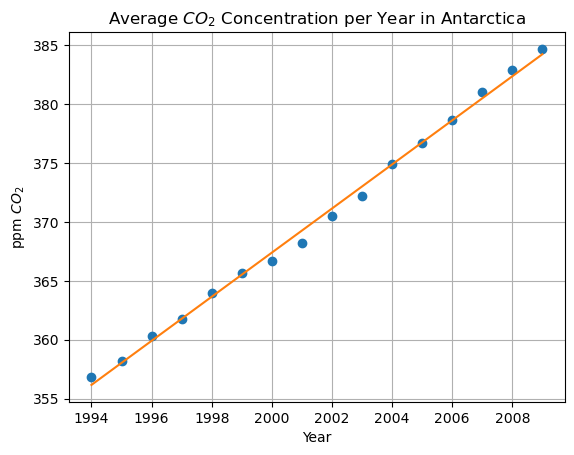

In [18]:
# use polyFit to fit a straight line to data

# polyfit for m=1 (line)
c = pyvot.polyFit(year.copy(), ppm.copy(), 1)

# plot data
plt.title("Average $CO_{2}$ Concentration per Year in Antarctica")
pyvot.plotPoly(year.copy(), ppm.copy(), c, "Year", "ppm $CO_{2}$")

## Part B